In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from general_utils import utils
import pickle as pkl
import numpy as np
import importlib
import project_utils.PatientBootstrap as PBS
import os

utils.default_plot_format()

#utils.pd_display_settings(3)


In [5]:
data_path = r'processed_data\raw_metrics\processed_10min_Nabian.pkl'

In [6]:


pickled = pd.read_pickle(data_path)
data = pickled["data"]
indicator_columns = pickled["indicator_columns"]
time_metrics = pickled["time_metrics"]
frequency_metrics = pickled["frequency_metrics"]
non_linear_metrics = pickled["non_linear_metrics"]

data.head()

,t_start,t_end,SDRR,RMSSD,pNN50 (%),Mean HR (bpm),ULF Power,ULF Peak Frequency,ULF Peak Power,VLF Power,...,Complications,Nephropathy,Retinopathy and cataract,DPN,Heart Disease,atherosclerosis or stenosis,Carotid Plaque,Condition,Peak Power,Peak Frequency
0,0.764,600.396,59.953222,50.339557,4.161567,81.746048,2.811084e-09,0.000000,1.972500e-06,0.000002,...,0.0,0.0,0.0,False,0.0,0.0,0.0,Diabetes,0.000202,0.290178
1,72044.620,72644.440,50.436358,50.276590,11.294766,72.622536,4.896880e-10,0.001667,3.819060e-07,0.000001,...,0.0,0.0,0.0,False,0.0,0.0,0.0,Diabetes,0.000645,0.181721
2,71444.292,72043.800,44.108359,39.049144,11.699164,71.855928,6.034593e-09,0.000000,4.631651e-06,0.000002,...,0.0,0.0,0.0,False,0.0,0.0,0.0,Diabetes,0.000644,0.178480
3,70844.052,71443.432,64.323347,47.553402,9.686221,73.359897,8.791265e-09,0.000000,7.081658e-06,0.000004,...,0.0,0.0,0.0,False,0.0,0.0,0.0,Diabetes,0.000629,0.176849
4,70243.220,70843.104,111.205365,95.765520,6.415621,71.718719,1.290554e-08,0.001667,8.629014e-06,0.000008,...,0.0,0.0,0.0,False,0.0,0.0,0.0,Diabetes,0.000325,0.365071


In [7]:
print("time_metrics =", time_metrics)
print("frequency_metrics =", frequency_metrics)
print("non_linear_metrics =", non_linear_metrics)

time_metrics = ['SDRR', 'RMSSD', 'pNN50 (%)', 'Mean HR (bpm)']
frequency_metrics = ['Peak Frequency', 'Peak Power', 'VLF Power', 'VLF Peak Frequency', 'LF Power', 'LF Peak Frequency', 'HF Power', 'HF Peak Frequency', 'LF÷HF Ratio']
non_linear_metrics = ['S', 'SD1', 'SD2', 'SD1÷SD2', 'ApEn', 'SampEn', 'DFA α1', 'DFA α2', 'D2']


# Resample mean for each condition repeatedly


In [8]:
control_id = data[~data['DPN']].id.unique()
dpn_id = data[data['DPN']].id.unique()

print(control_id, dpn_id)

[ 0  3  4  5  7 11 12 14 15 21 22 23 24 25 26 27 28 29 30 31 33 35] [37 38 39 40]


In [9]:
sampler = PBS.PatientBootstrap(data, n = 100000)

for metric in indicator_columns:
    sampler.sample_dpn_control(metric, dpn_id=dpn_id, control_id=control_id)

bayes_table = sampler.evaluate_bayes_metrics()

display(bayes_table.sort_values('Bayes_p', ascending=True))

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,D2,0.00166,-4.931699,5.866761,-3.052332,0.389466
0,LF Power,0.09631,0.000038,0.000016,0.000064,0.000012
0,HF Power,0.09776,0.000409,0.000116,0.000583,0.000057
0,Peak Power,0.09835,0.000409,0.000117,0.000583,0.000057
0,Mean HR (bpm),0.10213,81.849639,4.836248,75.150961,2.020461
0,pNN50 (%),0.10725,6.315263,5.184611,14.605747,3.055269
0,SD2,0.11528,70.430520,26.717684,108.304345,11.624173
0,SDRR,0.12559,57.652121,23.453202,89.521914,10.267522
0,RMSSD,0.15814,54.167047,29.322995,88.018658,13.244442
0,SD1,0.16052,38.285672,20.766738,62.166139,9.378248


## Bootstrapped Metric Distributions
### Bootstrapped Time Metrics

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SDRR,0.12559,57.652121,23.453202,89.521914,10.267522


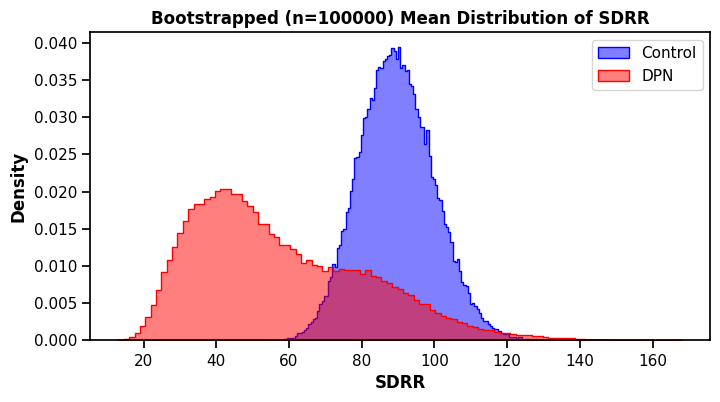

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,RMSSD,0.15814,54.167047,29.322995,88.018658,13.244442


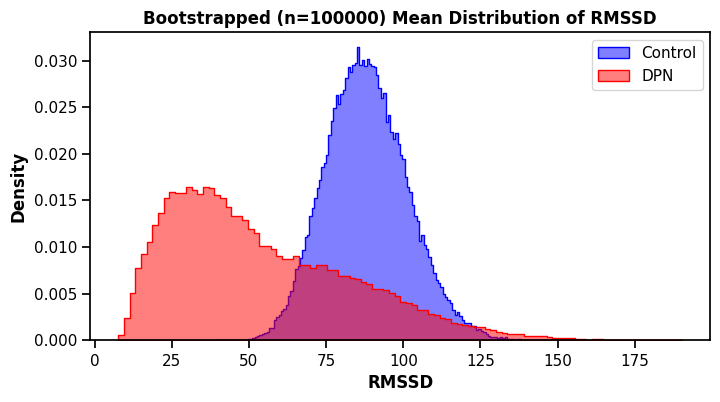

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,pNN50 (%),0.10725,6.315263,5.184611,14.605747,3.055269


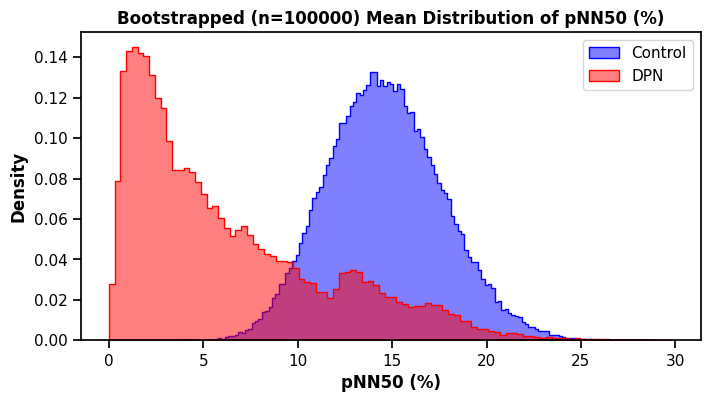

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,Mean HR (bpm),0.10213,81.849639,4.836248,75.150961,2.020461


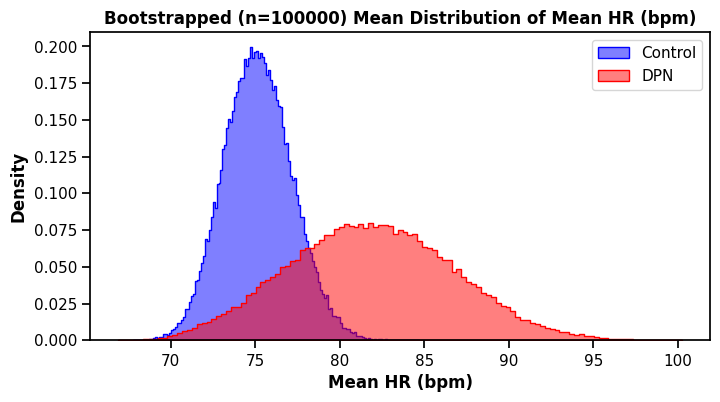

In [10]:
sampler.show_bayes_metrics(time_metrics)

### Bootstrapped Frequency Metrics

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,Peak Frequency,0.29478,0.340721,0.024067,0.326332,0.011372


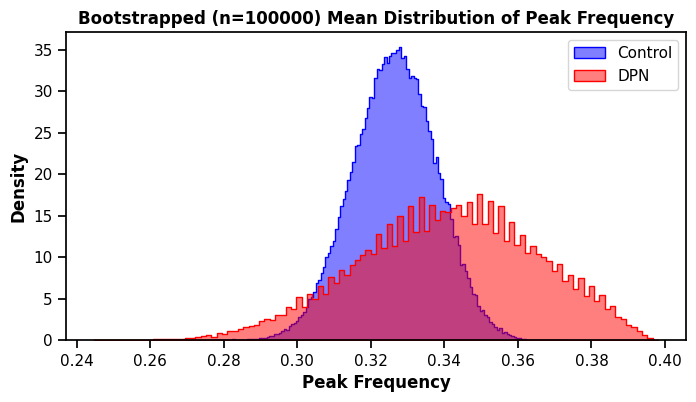

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,Peak Power,0.09835,0.000409,0.000117,0.000583,0.000057


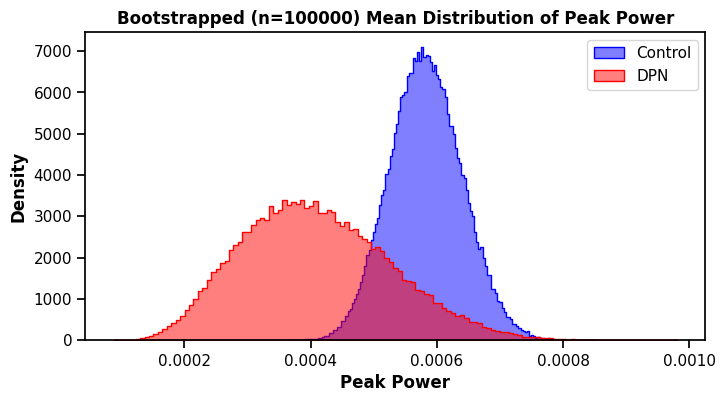

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,VLF Power,0.31853,0.000008,0.000008,0.000009,0.000003


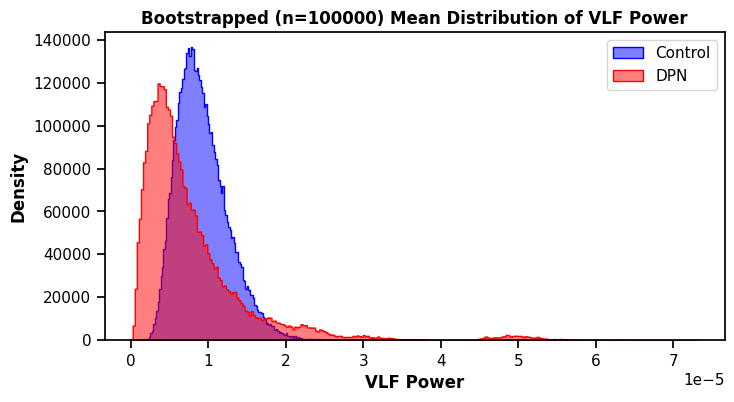

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,VLF Peak Frequency,0.37473,0.028878,0.003793,0.030334,0.001397


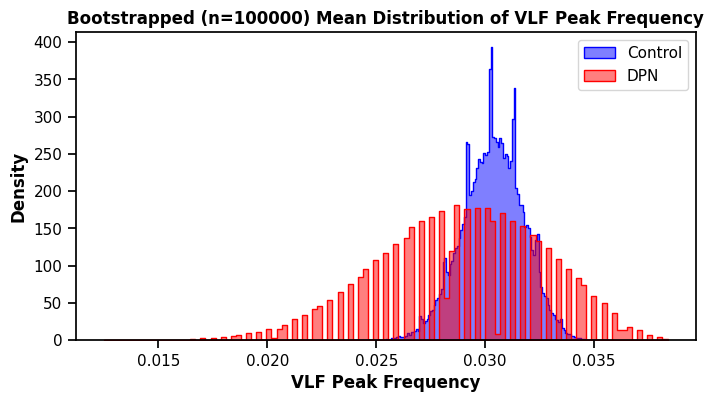

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,LF Power,0.09631,0.000038,0.000016,0.000064,0.000012


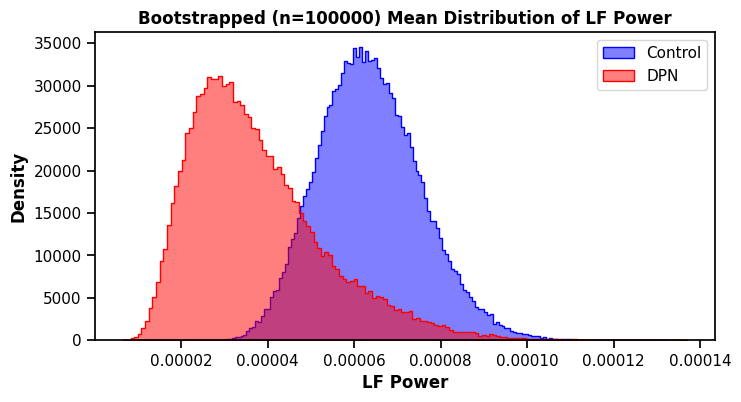

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,LF Peak Frequency,0.31986,0.101907,0.017437,0.110866,0.006265


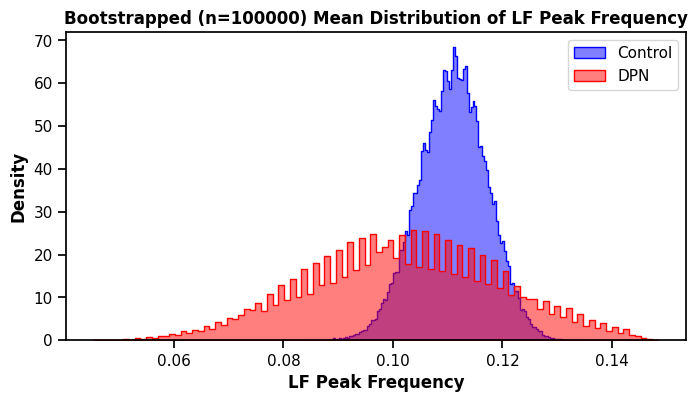

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,HF Power,0.09776,0.000409,0.000116,0.000583,0.000057


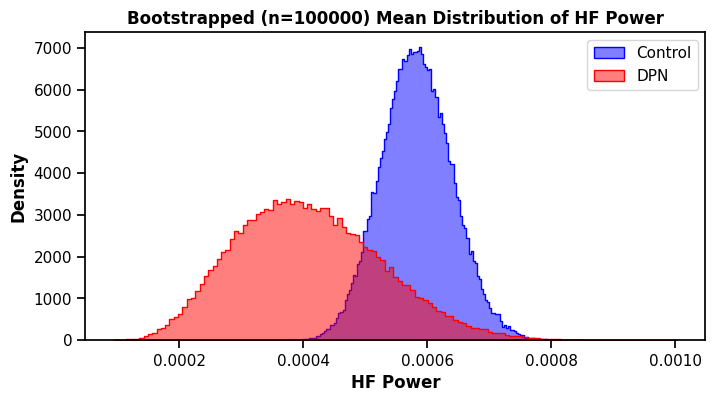

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,HF Peak Frequency,0.30289,0.340603,0.024096,0.326726,0.011252


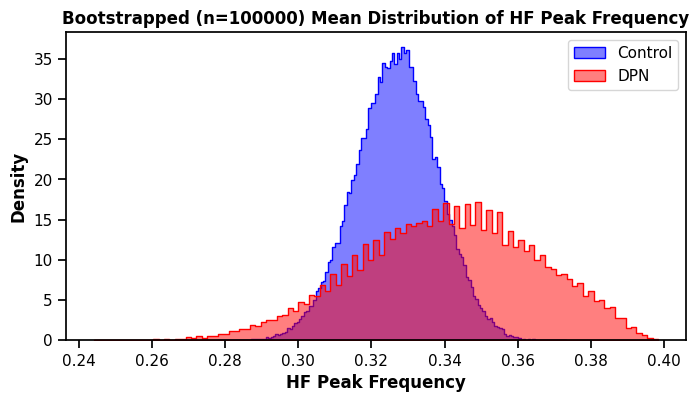

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,LF÷HF Ratio,0.36305,0.111046,0.045928,0.123932,0.024861


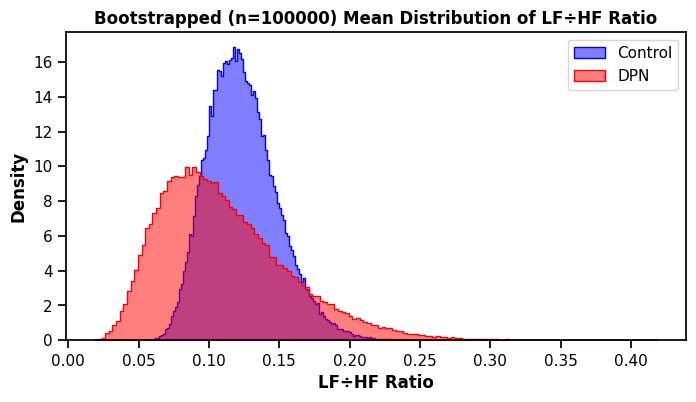

In [11]:
sampler.show_bayes_metrics(frequency_metrics)

There are significant issues with LF HF frequency calculation, as indicated by discontinuous means. 

### Bootstrapped Non Linear Metrics

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,S,0.21897,17714.170433,17334.884067,31507.425313,8684.044454


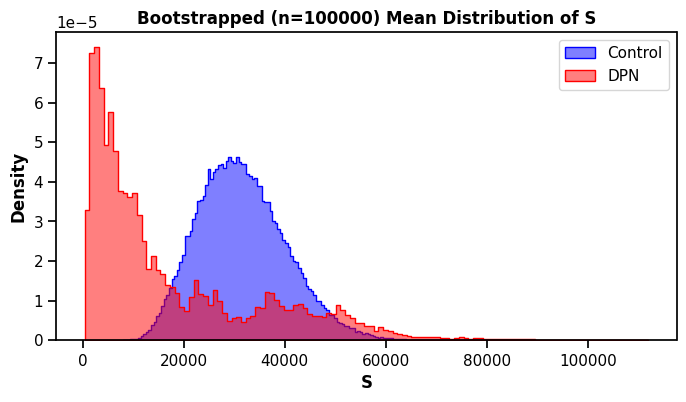

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SD1,0.16052,38.285672,20.766738,62.166139,9.378248


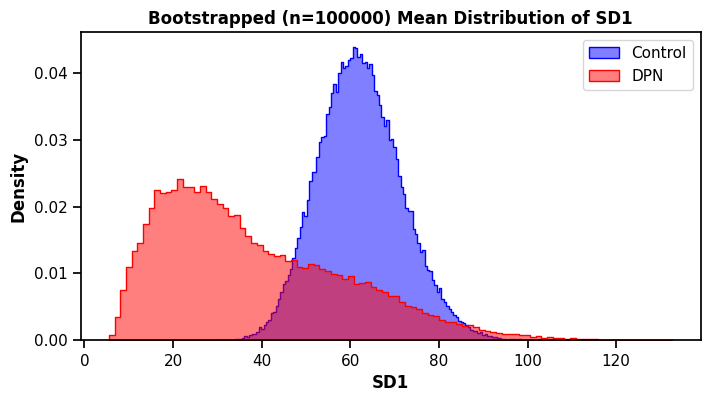

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SD2,0.11528,70.43052,26.717684,108.304345,11.624173


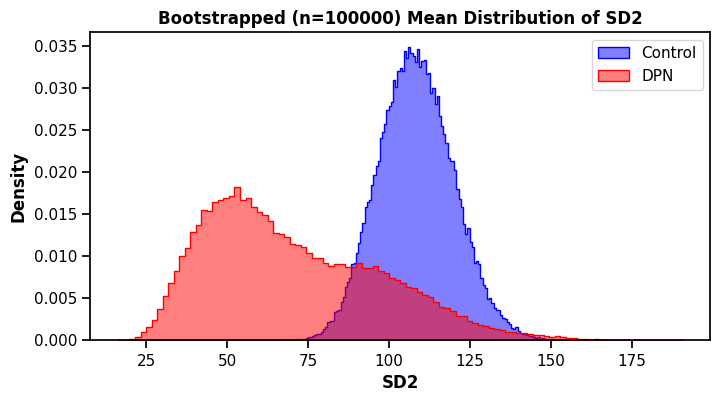

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SD1÷SD2,0.27413,0.457027,0.107511,0.522791,0.039692


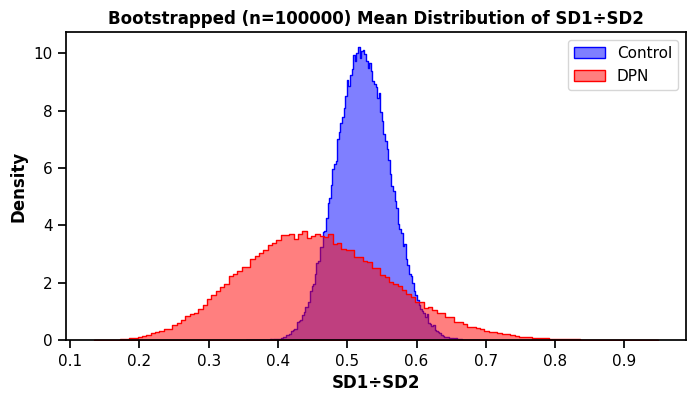

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,ApEn,0.49286,0.929592,0.158377,0.932039,0.05266


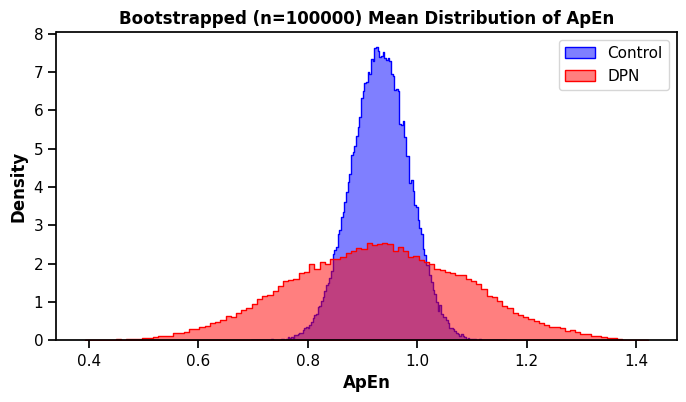

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,SampEn,0.47492,0.966536,0.23537,0.938394,0.08059


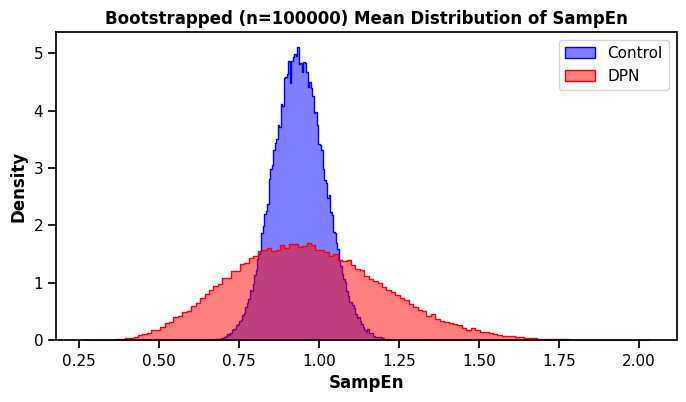

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,DFA α1,0.42428,0.95156,0.13525,0.924275,0.045099


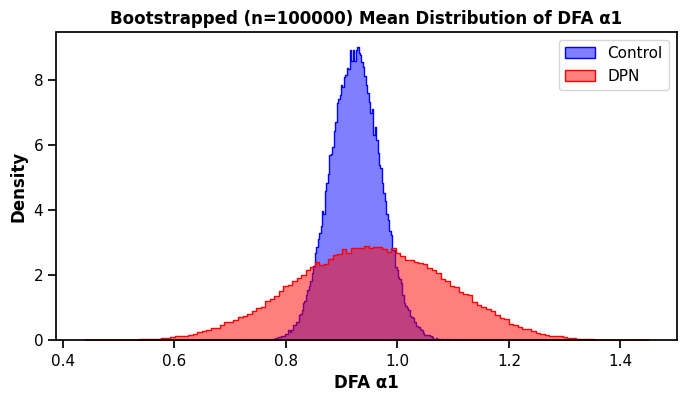

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,DFA α2,0.16904,0.956477,0.114451,0.839217,0.043023


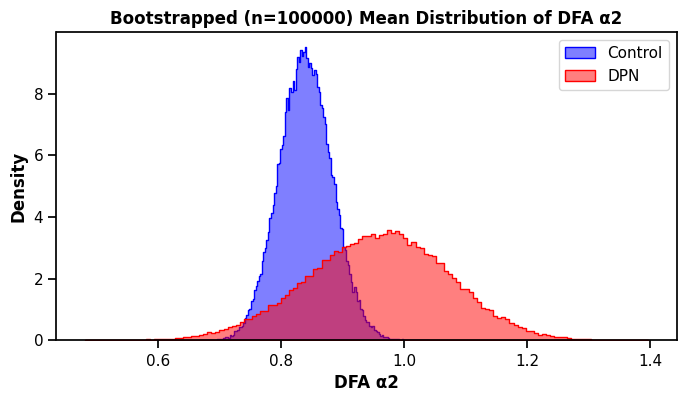

,Metric,Bayes_p,DPN_Mean,DPN_Std,Control_Mean,Control_Std
0,D2,0.00166,-4.931699,5.866761,-3.052332,0.389466


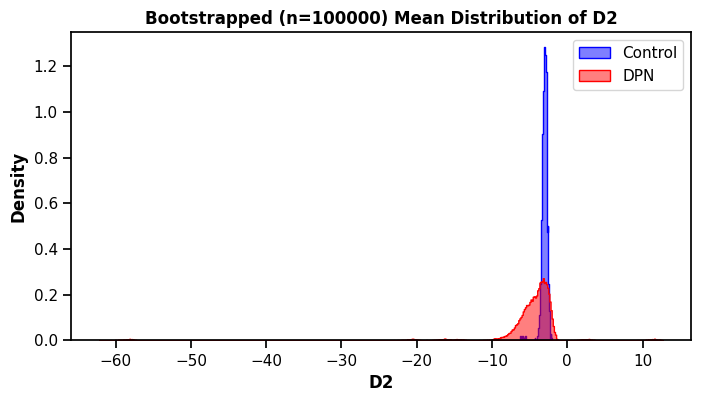

In [12]:
sampler.show_bayes_metrics(non_linear_metrics)

# Dumb classifier approach

this has yielded no good results

I have an idea that checking how suitable each value is for each population would allow me to classify the data

Construct a model that could tell how likely is each value to belong to one of the two pupulations.

Fit a gaussian model onto of each distribution.

In [13]:
from scipy.stats import norm

gaussian_dpn = {}
gaussian_controls ={}

for row in bayes_table.iterrows():
    metric = row[1]['Metric']

    dpn_mean = row[1]['DPN_Mean']
    dpn_std = row[1]['DPN_Std']
    gaussian_dpn[metric] = norm(dpn_mean, dpn_std)

    control_mean = row[1]['Control_Mean']
    control_std = row[1]['Control_Std']
    gaussian_controls[metric] = norm(control_mean, control_std)


calculate the chances of each value belonging to the distribution

In [14]:
chances = pd.DataFrame()
for row in data.iterrows():
  
    chance_dpn = {"x_"+metric: gaussian_dpn[metric].pdf(row[1][metric]) for metric in indicator_columns}

    chance_control = {"c_"+metric: gaussian_controls[metric].pdf(row[1][metric]) for metric in indicator_columns}
    
    chance_dpn = pd.Series(chance_dpn)
    chance_control = pd.Series(chance_control)

    result = {
        'DPN': row[1]['DPN'],
        'DPN_chance': chance_dpn.prod(),
        'control_chance': chance_control.prod(),
        **chance_dpn,
        **chance_control
    }


    chances = pd.concat([chances, pd.DataFrame([result])], ignore_index=True)

chances.tail()

,DPN,DPN_chance,control_chance,x_SDRR,x_RMSSD,x_pNN50 (%),x_Mean HR (bpm),x_Peak Frequency,x_Peak Power,x_VLF Power,...,c_LF÷HF Ratio,c_S,c_SD1,c_SD2,c_SD1÷SD2,c_ApEn,c_SampEn,c_DFA α1,c_DFA α2,c_D2
3205,True,7.786828e+03,1.356027e-71,8.869350e-03,8.192130e-03,0.063735,0.075384,7.898823,2716.542698,45485.429789,...,1.016416,1.537784e-07,4.839171e-07,1.082389e-09,9.001964e-01,1.517542e-16,2.118316e-16,0.632448,1.939120e-02,NaN
3206,True,8.907553e-04,1.189847e-86,1.300773e-02,1.076474e-02,0.033244,0.055031,3.043335,88.087083,39344.880300,...,0.055632,2.964585e-07,1.131107e-05,2.593635e-07,3.485982e+00,6.604486e-17,9.144354e-11,5.250214,2.908538e-12,9.084353e-11
3207,True,5.342682e-09,1.613249e-97,1.227660e-02,1.247947e-02,0.000021,0.036813,9.957318,19.010633,41925.255318,...,0.004401,3.379870e-07,1.056701e-04,1.970368e-08,8.443082e-02,5.664950e-15,6.367075e-43,0.009050,8.998283e+00,NaN
3208,True,3.284615e+02,8.374057e-40,7.156891e-03,1.014599e-02,0.036818,0.072361,2.270699,1243.809732,42197.029548,...,7.729691,1.446024e-06,5.349478e-06,1.531427e-02,1.023568e-15,7.318229e+00,2.831966e+00,0.698490,1.336973e-13,4.103414e-02
3209,True,4.175065e-32,1.325169e-141,8.129977e-08,1.489663e-09,0.000695,0.028025,2.301585,2051.714526,34766.656792,...,0.024993,6.068492e-16,1.075699e-23,6.141629e-13,7.970690e-12,1.017758e-16,2.497302e-14,0.000022,9.089666e+00,3.039147e-07


In [15]:
chances["shows_dpn"] = chances["DPN_chance"] > chances["control_chance"]

chances["true_positive"] = chances["shows_dpn"] & chances["DPN"]
chances["false_positive"] = chances["shows_dpn"] & ~chances["DPN"]
chances["true_negative"] = ~chances["shows_dpn"] & ~chances["DPN"]
chances["false_negative"] = ~chances["shows_dpn"] & chances["DPN"]


results = {
    "true_positive": chances["true_positive"].mean(),
    "true_negative": chances["true_negative"].mean(),
    "false_positive": chances["false_positive"].mean(),
    "false_negative": chances["false_negative"].mean()
}

print(results)

{'true_positive': 0.17133956386292834, 'true_negative': 0.002803738317757009, 'false_positive': 0.8258566978193146, 'false_negative': 0.0}


In [16]:
for metric in indicator_columns:
    chances[f"x_higher_{metric}"] = chances[f"x_{metric}"] > chances[f"c_{metric}"]


chances["dpn_favoring_metrics_count"] = chances[[f"x_higher_{metric}" for metric in indicator_columns]].sum(axis=1)
chances["control_favoring_metrics_count"] = len(indicator_columns) - chances["dpn_favoring_metrics_count"]


chances["dpn_favor_percentage"] = chances["dpn_favoring_metrics_count"] / len(indicator_columns) * 100
chances["control_favor_percentage"] = chances["control_favoring_metrics_count"] / len(indicator_columns) * 100

metric_counts = {
    "avg_dpn_favoring_metrics": chances["dpn_favoring_metrics_count"].mean(),
    "avg_control_favoring_metrics": chances["control_favoring_metrics_count"].mean(),
    "avg_dpn_favor_percentage": chances["dpn_favor_percentage"].mean(),
    "avg_control_favor_percentage": chances["control_favor_percentage"].mean()
}

print("Average metrics per patient:")
for key, value in metric_counts.items():
    print(f"{key}: {value:.2f}")


print("\nAverage for actual DPN patients:")
print(f"dpn_favoring_metrics: {chances[chances['DPN']]['dpn_favoring_metrics_count'].mean():.2f}")
print(f"control_favoring_metrics: {chances[chances['DPN']]['control_favoring_metrics_count'].mean():.2f}")

print("\nAverage for actual control patients:")
print(f"dpn_favoring_metrics: {chances[~chances['DPN']]['dpn_favoring_metrics_count'].mean():.2f}")
print(f"control_favoring_metrics: {chances[~chances['DPN']]['control_favoring_metrics_count'].mean():.2f}")

Average metrics per patient:
avg_dpn_favoring_metrics: 16.96
avg_control_favoring_metrics: 5.04
avg_dpn_favor_percentage: 77.11
avg_control_favor_percentage: 22.89

Average for actual DPN patients:
dpn_favoring_metrics: 18.05
control_favoring_metrics: 3.95

Average for actual control patients:
dpn_favoring_metrics: 16.74
control_favoring_metrics: 5.26
